<a href="https://colab.research.google.com/github/heejvely/python-machine_learning-practice/blob/main/ml_%ED%94%BC%EB%A7%88%EC%9D%B8%EB%94%94%EC%96%B8_%EB%8B%B9%EB%87%A8%EB%B3%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/빅분기연습/dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
import numpy as np

df.SkinThickness.replace(0,np.mean(df['SkinThickness']),inplace=True)
df.Insulin.replace(0,np.mean(df['Insulin']),inplace=True)

In [5]:
df.Glucose.replace(0,np.mean(df['Glucose']),inplace=True)
df.BloodPressure.replace(0,np.mean(df['BloodPressure']),inplace=True)
df.BMI.replace(0,np.mean(df['BMI']),inplace=True)

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

X = df.drop('Outcome',axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=121)

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
pred_proba = rf_clf.predict_proba(X_test)[:,1]

accuracy_score(y_test, y_pred)

0.8246753246753247

In [11]:
def get_eval(y_test, pred, pred_proba):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  auc = roc_auc_score(y_test, pred_proba)
  print('오차행렬')
  print(confusion)
  print(f'정확도:{accuracy:.4f}, 정밀도:{precision:.4f}, 재현률:{recall:.4f}, F1:{f1:.4f}, AUC:{auc:.4f}')
    
get_eval(y_test,y_pred, pred_proba)

오차행렬
[[93  7]
 [20 34]]
정확도:0.8247, 정밀도:0.8293, 재현률:0.6296, F1:0.7158, AUC:0.9169


In [13]:
from sklearn.metrics import roc_curve
fprs, tprs, thresholds = roc_curve(y_test, pred_proba)

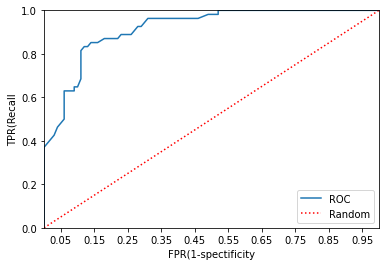

In [15]:
import matplotlib.pyplot as plt

def roc_curve_plot(y_test, pred_proba):
  fprs, tprs, thresholds = roc_curve(y_test, pred_proba)
  plt.plot(fprs, tprs, label = 'ROC')
  plt.plot([0,1],[0,1], 'r:', label='Random')

  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1),2))
  plt.xlim(0,1)
  plt.ylim(0,1)
  plt.xlabel('FPR(1-spectificity')
  plt.ylabel('TPR(Recall')
  plt.legend()
  plt.show()

roc_curve_plot(y_test, pred_proba)

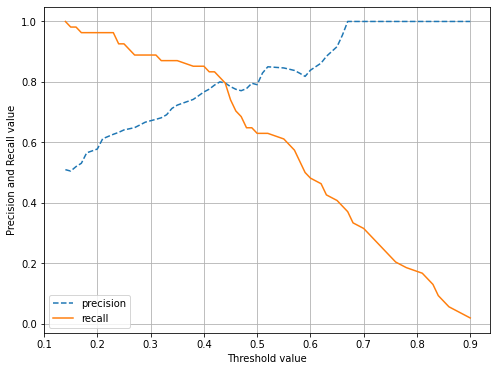

In [17]:
from sklearn.metrics import precision_recall_curve
import matplotlib.ticker as ticker

pred_proba_c1 = rf_clf.predict_proba(X_test)[:,1]
def precision_recall_curve_plot(y_test, pred_proba_c1):
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  plt.figure(figsize=(8,6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
  plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1),2))

  plt.xlabel('Threshold value')
  plt.ylabel('Precision and Recall value')
  plt.legend()
  plt.grid()
  plt.show()

precision_recall_curve_plot(y_test, pred_proba_c1)

In [24]:
from sklearn.preprocessing import Binarizer

thresholds = np.arange(0.35, 0.51, 0.01)

def get_eval_by_thresholds(y_test, pred_proba_c1, thresholds):
  for i in thresholds:
    binarizer = Binarizer(threshold = i).fit(pred_proba_c1)
    custom_predict = binarizer.transform(pred_proba_c1)
    print('임계값',i)
    get_eval(y_test, custom_predict, pred_proba)
    print()

get_eval_by_thresholds(y_test, pred_proba_c1.reshape(-1,1),thresholds)

임계값 0.35
오차행렬
[[84 16]
 [ 8 46]]
정확도:0.8442, 정밀도:0.7419, 재현률:0.8519, F1:0.7931, AUC:0.9169

임계값 0.36
오차행렬
[[84 16]
 [ 8 46]]
정확도:0.8442, 정밀도:0.7419, 재현률:0.8519, F1:0.7931, AUC:0.9169

임계값 0.37
오차행렬
[[84 16]
 [ 8 46]]
정확도:0.8442, 정밀도:0.7419, 재현률:0.8519, F1:0.7931, AUC:0.9169

임계값 0.38
오차행렬
[[85 15]
 [ 8 46]]
정확도:0.8506, 정밀도:0.7541, 재현률:0.8519, F1:0.8000, AUC:0.9169

임계값 0.39
오차행렬
[[86 14]
 [ 8 46]]
정확도:0.8571, 정밀도:0.7667, 재현률:0.8519, F1:0.8070, AUC:0.9169

임계값 0.4
오차행렬
[[87 13]
 [ 9 45]]
정확도:0.8571, 정밀도:0.7759, 재현률:0.8333, F1:0.8036, AUC:0.9169

임계값 0.41000000000000003
오차행렬
[[88 12]
 [ 9 45]]
정확도:0.8636, 정밀도:0.7895, 재현률:0.8333, F1:0.8108, AUC:0.9169

임계값 0.42000000000000004
오차행렬
[[89 11]
 [10 44]]
정확도:0.8636, 정밀도:0.8000, 재현률:0.8148, F1:0.8073, AUC:0.9169

임계값 0.43000000000000005
오차행렬
[[89 11]
 [11 43]]
정확도:0.8571, 정밀도:0.7963, 재현률:0.7963, F1:0.7963, AUC:0.9169

임계값 0.44000000000000006
오차행렬
[[89 11]
 [14 40]]
정확도:0.8377, 정밀도:0.7843, 재현률:0.7407, F1:0.7619, AUC:0.9169

임계값 0.450000000000000